# Expanding Capacity and Enhancing Attendance

### GoalZone's Strategy to Optimize Fitness Class Availability in Canada


In [78]:
# Import necessary libraries and modules

# Import the 'pandas' library and use the alias 'pd' for data manipulation and analysis
import pandas as pd

# Import the 'numpy' library and use the alias 'np' for numerical operations
import numpy as np

# Import data visualization libraries for creating plots and charts
import matplotlib.pyplot as plt
import seaborn as sns

# Import the 'train_test_split' function for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# Import the 'LogisticRegression' class for logistic regression modeling
from sklearn.linear_model import LogisticRegression

# Import metrics for model evaluation
from sklearn.metrics import accuracy_score, classification_report

# Import the 'RandomForestClassifier' class for random forest classification modeling
from sklearn.ensemble import RandomForestClassifier

# Import additional metrics for classification model evaluation
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [79]:
# Load the dataset

# Use the 'pd.read_csv' function from the 'pandas' library to read a CSV file located at the specified path
# The dataset is loaded into a DataFrame named 'df'
df = pd.read_csv('fitness_class_2212.csv')

In [80]:
# Display information about the DataFrame

# Use the 'info()' method on the DataFrame 'df' to retrieve and display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


## Data Validation Process

In [81]:
def check_missing_duplicates(df, column_name):
    """
    Check if a column in a DataFrame has missing or duplicated values.

    Args:
    - df (DataFrame): The DataFrame to check.
    - column_name (str): The name of the column to check.

    Returns:
    - message (str): A message indicating the result.
    """
    # Count missing values
    missing_count = df[column_name].isnull().sum()

    # Count duplicated values
    duplicated_count = df[df[column_name].duplicated()].shape[0]

    # Generate message
    message = f"Column: '{column_name}'\n"
    if missing_count > 0:
        message += f"Missing values count: {missing_count}\n"
    if duplicated_count > 0:
        message += f"Duplicated values count: {duplicated_count}\n"
    if missing_count == 0 and duplicated_count == 0:
        message += "No missing or duplicated values found.\n"

    return message

""" # Example usage:
# Assuming you have a DataFrame 'df' and want to check the 'column_to_check'
result_message = check_missing_duplicates2(df, 'column_to_check')

# Print the result message
print(result_message) """

" # Example usage:\n# Assuming you have a DataFrame 'df' and want to check the 'column_to_check'\nresult_message = check_missing_duplicates2(df, 'column_to_check')\n\n# Print the result message\nprint(result_message) "

### `booking_id`

In [82]:
# Check the 'booking_id' column for missing and duplicated values

# Use the 'check_missing_duplicates' function to examine the 'booking_id' column in the DataFrame 'df'
result_message = check_missing_duplicates(df, 'booking_id')

# Print the result message indicating the presence of missing or duplicated values
print(result_message)

# Print the data type of the 'booking_id' column
print('Data Type', df['booking_id'].dtype)

Column: 'booking_id'
No missing or duplicated values found.

Data Type int64


### `months_as_member`

In [83]:
# Check the 'months_as_member' column for missing and duplicated values

# Use the 'check_missing_duplicates' function to examine the 'months_as_member' column in the DataFrame 'df'
result_message = check_missing_duplicates(df, 'months_as_member')

# Print the result message indicating the presence of missing or duplicated values
print(result_message)

# Print the data type of the 'months_as_member' column
print('Data Type:', df['months_as_member'].dtype)

Column: 'months_as_member'
Duplicated values count: 1428

Data Type: int64


### `weight`

In [84]:
# Check the 'weight' column for missing and duplicated values

# Use the 'check_missing_duplicates' function to examine the 'weight' column in the DataFrame 'df'
result_message = check_missing_duplicates(df, 'weight')

# Print the result message indicating the presence of missing or duplicated values
print(result_message)

Column: 'weight'
Missing values count: 20
Duplicated values count: 258



In [85]:
# Replace missing values in the 'weight' column with the overall average weight

# Calculate the overall average weight from the 'weight' column
overall_avg_weight = df['weight'].mean()

# Use the 'fillna' method to replace missing values in the 'weight' column with the overall average weight
df['weight'].fillna(overall_avg_weight, inplace=True)

# Print the data type of the 'weight' column after replacement
print('Data Type:', df['weight'].dtype)

Data Type: float64


### `days_before`

In [86]:
# Check the 'days_before' column for missing and duplicated values

# Use the 'check_missing_duplicates' function to examine the 'days_before' column in the DataFrame 'df'
result_message = check_missing_duplicates(df, 'days_before')

# Print the result message indicating the presence of missing or duplicated values
print(result_message)

# Display unique values in the 'days_before' column
df['days_before'].unique()

Column: 'days_before'
Duplicated values count: 1469



array(['8', '2', '14', '10', '6', '4', '9', '12', '5', '3', '7', '13',
       '12 days', '20', '1', '15', '6 days', '11', '13 days', '3 days',
       '16', '1 days', '7 days', '8 days', '10 days', '14 days', '17',
       '5 days', '2 days', '4 days', '29'], dtype=object)

In [87]:
# Remove the 'days' text from the 'days_before' column

# Use the 'str.replace' method to remove the ' days' text from the 'days_before' column
df['days_before'] = df['days_before'].str.replace(' days', '')

# Convert the 'days_before' column to numeric

# Use the 'pd.to_numeric' function to convert the 'days_before' column to a numeric data type
# The 'errors' parameter is set to 'coerce' to handle any conversion errors by replacing them with 'NaN'
df['days_before'] = pd.to_numeric(df['days_before'], errors='coerce')

# Check the data type of the column after conversion
print(df['days_before'].dtype)

int64


### `day_of_week`

In [88]:
# Check the 'day_of_week' column for missing and duplicated values

# Use the 'check_missing_duplicates' function to examine the 'day_of_week' column in the DataFrame 'df'
result_message = check_missing_duplicates(df, 'day_of_week')

# Print the result message indicating the presence of missing or duplicated values
print(result_message)

# Display the counts of unique values in the 'day_of_week' column
df['day_of_week'].value_counts()

Column: 'day_of_week'
Duplicated values count: 1490



Fri          279
Thu          241
Mon          218
Sun          213
Sat          202
Tue          195
Wed           81
Wednesday     35
Fri.          26
Monday        10
Name: day_of_week, dtype: int64

In [89]:
# Display the unique values present in the 'day_of_week' column
df['day_of_week'].unique()

array(['Wed', 'Mon', 'Sun', 'Fri', 'Thu', 'Wednesday', 'Fri.', 'Tue',
       'Sat', 'Monday'], dtype=object)

In [90]:
def generate_day_mapping():
    """
    Generate a dictionary to map full day names to their abbreviations.

    Returns:
    - dict: A dictionary with mappings from full day names to abbreviations.
    """
    # Define a list of full day names and their corresponding abbreviations
    days_and_abbreviations = [
        ('Monday', 'Mon'),
        ('Tuesday', 'Tue'),
        ('Wednesday', 'Wed'),
        ('Thursday', 'Thu'),
        ('Friday', 'Fri'),
        ('Saturday', 'Sat'),
        ('Sunday', 'Sun'),
    ]

    # Create a dictionary from the list of tuples
    day_mapping = dict(days_and_abbreviations)

    return day_mapping

def abbreviate_days(day_names):
    """
    Transform day names into their abbreviated versions.

    Args:
    - day_names (list or str): A list of day names or a single string containing day names.

    Returns:
    - list: A list of abbreviated day names.
    """
    # Get the day mapping
    day_mapping = generate_day_mapping()

    # If input is a string, split it by spaces and handle variations
    if isinstance(day_names, str):
        # Remove non-alphabet characters (e.g., punctuation marks)
        import re
        day_names = re.sub(r'[^a-zA-Z\s]', '', day_names).split()

    # Use a list comprehension to apply the mapping and handle variations
    abbreviated_days = [day_mapping.get(day, day) for day in day_names]

    return abbreviated_days

""" # Example usage:
input_day_names = 'Mon, Tuesday; Wednesday! Thu Fri. Sat Sunday'
abbreviated_result = abbreviate_days(input_day_names)
print(abbreviated_result) """

" # Example usage:\ninput_day_names = 'Mon, Tuesday; Wednesday! Thu Fri. Sat Sunday'\nabbreviated_result = abbreviate_days(input_day_names)\nprint(abbreviated_result) "

In [91]:
# Apply a function to abbreviate the values in the 'day_of_week' column

# Use the 'apply' method on the 'day_of_week' column in the DataFrame 'df'
# The function 'abbreviate_days' is applied to each value in the column
df['day_of_week'] = df['day_of_week'].apply(abbreviate_days)

In [92]:
# Ensure each element in the 'day_of_week' column is a string

# Use the 'apply' method with a lambda function to ensure that each element in the 'day_of_week' column is a string
# If an element is a list, it is joined into a string; otherwise, it remains unchanged
df['day_of_week'] = df['day_of_week'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Print unique values in the 'day_of_week' column
print(df['day_of_week'].unique())

# Print the data type of the 'day_of_week' column
print(df['day_of_week'].dtype)

# Display the counts of unique values in the 'day_of_week' column
df['day_of_week'].value_counts()

['Wed' 'Mon' 'Sun' 'Fri' 'Thu' 'Tue' 'Sat']
object


Fri    305
Thu    241
Mon    228
Sun    213
Sat    202
Tue    195
Wed    116
Name: day_of_week, dtype: int64

### `time`

In [93]:
# Check the 'time' column for missing and duplicated values

# Use the 'check_missing_duplicates' function to examine the 'time' column in the DataFrame 'df'
result_message = check_missing_duplicates(df, 'time')

# Print the result message indicating the presence of missing or duplicated values
print(result_message)

# Print the data type of the 'time' column
print('Data Type', df['time'].dtype)

# Display the counts of unique values in the 'time' column
df['time'].value_counts()

Column: 'time'
Duplicated values count: 1498

Data Type object


AM    1141
PM     359
Name: time, dtype: int64

### `category`

In [94]:
# Check the 'category' column for missing and duplicated values

# Use the 'check_missing_duplicates' function to examine the 'category' column in the DataFrame 'df'
result_message = check_missing_duplicates(df, 'category')

# Print the result message indicating the presence of missing or duplicated values
print(result_message)

# Print the data type of the 'category' column
print('Data Type', df['category'].dtype)

# Display the counts of unique values in the 'category' column
df['category'].value_counts()

Column: 'category'
Duplicated values count: 1494

Data Type object


HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
-            13
Name: category, dtype: int64

In [95]:
# Replace '-' with 'unknown' in the 'category' column

# Use the 'replace' method to replace all occurrences of '-' with 'unknown' in the 'category' column
df['category'] = df['category'].replace('-', 'unknown')

# Check the updated value counts in the 'category' column
value_counts = df['category'].value_counts()

# Print the updated value counts
print(value_counts)

HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
unknown      13
Name: category, dtype: int64


### `attended`

In [96]:
# Check the 'attended' column for missing and duplicated values

# Use the 'check_missing_duplicates' function to examine the 'attended' column in the DataFrame 'df'
result_message = check_missing_duplicates(df, 'attended')

# Print the result message indicating the presence of missing or duplicated values
print(result_message)

# Print the data type of the 'attended' column
print('Data Type', df['attended'].dtype)

# Display the counts of unique values in the 'attended' column
df['attended'].value_counts()

Column: 'attended'
Duplicated values count: 1498

Data Type int64


0    1046
1     454
Name: attended, dtype: int64

## Task 1 

| Column Name       | Values Match Description | Missing Values | Duplicate values | Actions Taken           |
|-------------------|--------------------------|----------------|------------------|-------------------------|
| booking_id        | ✓                        | 0              |      0           | None                    |
| months_as_member  | ✓                        | 0              |   1428           | None                    |
| weight            | ✓                        | 20             |    258           | Standardized            |
| days_before       | ✓                        | 0              |   1469           | Standardized            |
| day_of_week       | ✓                        | 0              |   1490           | Standardized            |
| time              | ✓                        | 0              |   1498           | None                    |
| category          | ✓                        | 0              |   1494           | Standardized            |
| attended          | ✓                        | 0              |   1498           | None                    |

---

- `booking_id`: 
    + Values were as expected, no changes needed.
- `months_as_member`:
    + No Missing Values.
    + The presence of duplicate values in the column does not impact the quality or validity of our data. It simply reflects the diverse membership durations of our valued club members.
    + Understanding the nature of this column and the potential for duplicate values allows us to work with the data effectively, providing valuable insights into our members' loyalty and engagement over time.
- `weight`:
    + We replaced the missing values in the 'weight' column with the overall average weight of our club members. This approach ensures that we have a representative value in place of missing data, allowing us to include these records in our analysis without bias.
    + It's important to acknowledge that in the 'weight' column, you may notice repeated values. This is completely normal and can be attributed to the diversity of our club members. Since weight values are rounded to two decimal places, it is not uncommon for multiple individuals to have the same weight.
- `days_before`:
    + No Missing Values.
    + We removed the word 'days' from all values in the 'days_before' column. This transformation allows us to work with a consistent numeric representation of the number of days before class registration, eliminating potential data discrepancies.
    + It is normal to encounter duplicate values. The nature of this data column—representing the number of days before registration—is such that multiple members may register for classes with the same time gap.
- `day_of_week`:
    + No Missing Values.
    + We standardized the values in the column to conform to the specified days of the week format. This involved removing any extra characters and ensuring that all entries matched one of the valid days of the week.
    + Duplicate values in this context reflect the scheduling of multiple fitness classes on the same day of the week. It is entirely normal for classes to be offered on the same day, leading to the presence of duplicate entries.
- `time`:
    + No Missing Values.
    + Duplicate values in this context are normal and expected because multiple fitness classes may occur at the same time of day. For example, we may have several classes scheduled in the morning ("AM") or afternoon/evening ("PM") time slots.
- `category`:
    + No Missing Values.
    + We replaced the inconsistent value '-' with 'unknown' in the column. This correction ensures that all entries in the column align with one of the valid fitness class categories.
    + Duplicate values in this context reflect the presence of multiple fitness classes falling within the same category. It is entirely normal for us to offer various classes within each category, leading to the presence of duplicate entries.
- `attended`:
    + No Missing Values.
    + Duplicate values in this context are expected and not unusual. This is because multiple members may have the same attendance status, attending or not attending the same class.

## Task 2

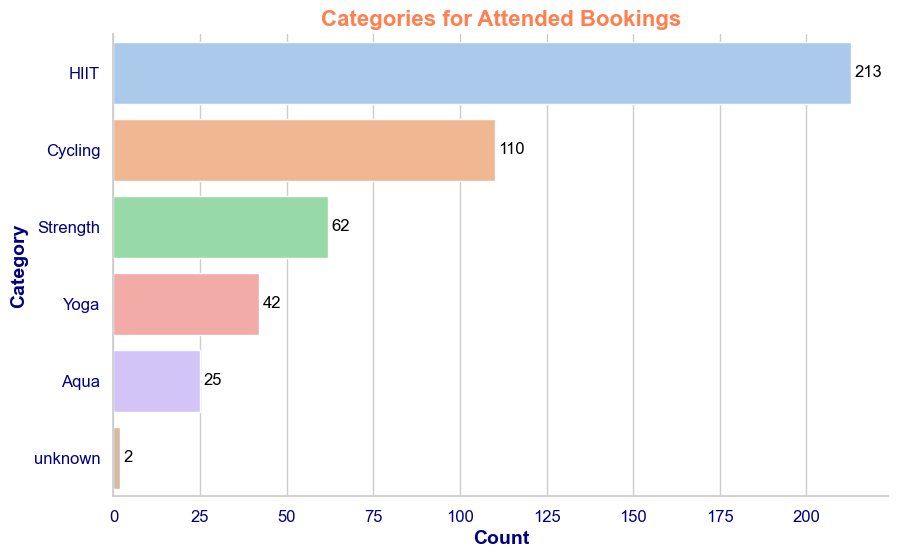

In [97]:
# Filter the DataFrame to include only rows where 'attended' is 1
attended_data = df[df['attended'] == 1]

# Count the number of bookings in each category
category_counts = attended_data['category'].value_counts()

# Create a custom color palette with gradient colors
colors = sns.color_palette("pastel")

# Set a modern Seaborn style
sns.set(style="whitegrid")

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a horizontal bar plot to visualize the categories for attended bookings
ax = sns.barplot(y=category_counts.index, x=category_counts.values, palette=colors)

# Add count labels on each bar with custom font size and color
for i, count in enumerate(category_counts.values):
    ax.text(count + 1, i, str(count), va='center', fontsize=12, color='black')

# Add a title to the plot with custom font size and weight
plt.title("Categories for Attended Bookings", fontsize=16, color='coral', fontweight='bold')

# Label the x and y axes with custom font size and weight
plt.xlabel("Count", fontsize=14, fontweight='bold', color='navy')
plt.ylabel("Category", fontsize=14, fontweight='bold', color='navy')

# Customize tick parameters
plt.xticks(fontsize=12, color='navy')
plt.yticks(fontsize=12, color='navy')

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()

**a.** Among the different types of fitness classes, the one called 'HIIT' has the most people attending, with 213 attendees. You can see this because the bar representing 'HIIT' on the graph is the tallest.

**b.** When we look at the attendance for all the different fitness class types, it's clear that not all classes have the same number of attendees. For example, 'HIIT' and 'Cycling' have the most attendees, with 213 and 110 attendees respectively. On the other hand, classes like 'Strength,' 'Yoga,' and 'Aqua' have fewer attendees, with 62, 42, and 25 attendees respectively. There's also a category called 'unknown' that has the fewest attendees, with only 2 attendees. This difference in attendance numbers suggests that some classes, like 'HIIT' and 'Cycling,' are much more popular than the others.

## Task 3


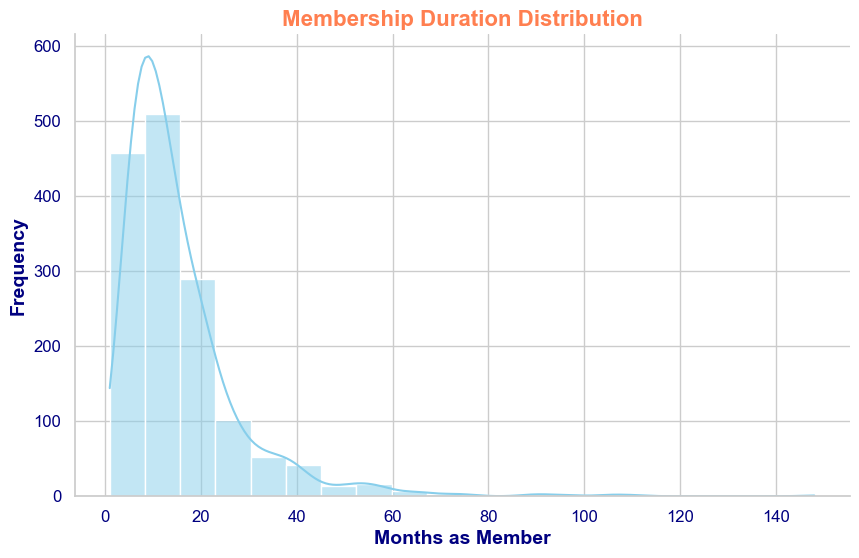

In [98]:
# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Set a modern Seaborn style
sns.set(style="whitegrid")

# Create a histogram to visualize the distribution of 'months_as_member' with a gradient color
ax = sns.histplot(data=df, x='months_as_member', bins=20, kde=True, color='skyblue')

# Add a title to the plot with a warm color
plt.title("Membership Duration Distribution", fontsize=16, color='coral', fontweight='bold')

# Label the x and y axes with custom font size and color
plt.xlabel("Months as Member", fontsize=14, fontweight='bold', color='navy')
plt.ylabel("Frequency", fontsize=14, fontweight='bold', color='navy')

# Customize tick parameters
plt.xticks(fontsize=12, color='navy')
plt.yticks(fontsize=12, color='navy')

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()

**Distribution of Membership Durations**

- The average membership duration is approximately 15.63 months, which means that, on average, members have been with the club for about 15 and a half months.

- The most common or typical membership duration, known as the median (middle value), is 12.00 months. This suggests that half of the members have been with the club for less than a year, and half have been members for more than a year.

- The 25% of members who have been with the club for the shortest durations have memberships of 8.00 months or less. These are relatively newer members.

- On the other hand, the 25% of members who have been with the club for the longest durations have memberships of 19.00 months or more. These are long-term members who have been with the club for a substantial period.

- The distribution of membership durations shows that there is some variation, with a range from 1 month to 60 months. However, the most common membership duration is approximately one year.

## Task 4


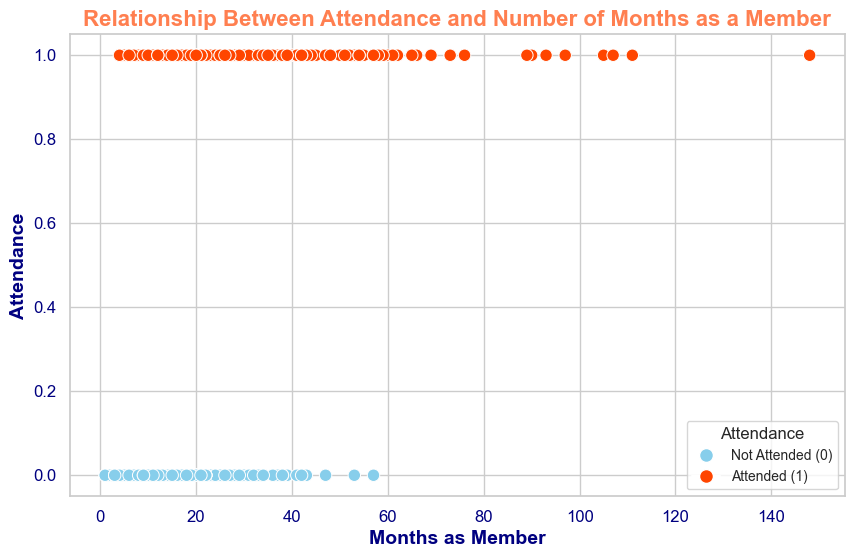

In [99]:
# Define a custom color mapping for 'attended' values
color_mapping = {0: 'skyblue', 1: 'orangered'}

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a scatter plot to visualize the relationship with distinct colors for 'attended'
sns.scatterplot(data=df, x='months_as_member', y='attended', hue='attended', palette=color_mapping, s=80, legend=False)

# Add a title to the plot
plt.title("Relationship Between Attendance and Number of Months as a Member", fontsize=16, color='coral', fontweight='bold')

# Label the x and y axes with custom font size
plt.xlabel("Months as Member", fontsize=14, fontweight='bold', color='navy')
plt.ylabel("Attendance", fontsize=14, fontweight='bold', color='navy')

plt.xticks(fontsize=12, color='navy')
plt.yticks(fontsize=12, color='navy')

# Set custom legend labels and title
legend_labels = ['Not Attended (0)', 'Attended (1)']

# Create custom legend markers with appropriate colors
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[i], markersize=10, markerfacecolor=color_mapping[i]) for i in range(len(legend_labels))]

# Add the legend with custom markers
legend = plt.legend(handles=legend_elements, title="Attendance", fontsize=10)

# Show the plot
plt.show()

In [100]:
# Calculate the correlation coefficient
correlation_coefficient = df['months_as_member'].corr(df['attended'])

# Print the correlation coefficient
print("Correlation Coefficient between Months as Member and Attendance:", correlation_coefficient)

Correlation Coefficient between Months as Member and Attendance: 0.48552622327526346


**Understanding Member Behavior**

- There's a noticeable connection between how long someone has been a member and how often they attend our fitness classes. Let's dive into what this means.

- 📊 **Moderate Positive Relationship**: On average, as members stay with us for more months, they tend to attend more classes. It's like a gradual increase in attendance as membership duration grows.

- 🌟 **Individual Differences**: However, there are individual differences. Some members who've recently joined might be super dedicated and attend frequently, while others who've been with us longer might have different routines. So, membership duration isn't the only factor.

- 🤔 **More to Explore**: While membership duration matters, we should also consider other factors like the type of classes members prefer, the time of day, and personal goals.

In simple terms, our longer-term members generally attend more classes, but we're a diverse club, and each member's journey is unique.

## Task 5


**Understanding Our Prediction Challenge**

- 🤖 **Machine Learning Magic**: We're diving into the world of machine learning to make predictions about our members' class attendance.

- 💼 **Classification Task**: Imagine it as a sorting game. We want to sort our members into two groups: those who will attend a class (yes) and those who won't (no).

- 🎯 **Binary Classification**: It's like a yes-or-no question. Will they attend? (yes) or not? (no). Our machine learning model will decide based on some clues from the data.

- 📊 **Using Clues**: We'll use information like how long someone has been a member, their weight, and other details to make these predictions.

In simple terms, our goal is to predict whether a member will show up for a class or not. It's like having a crystal ball for our fitness club attendance!

## Task 6


In [101]:
# Prepare the data
# Encode categorical variables, and select features
data = pd.get_dummies(df, columns=['day_of_week', 'time', 'category'], prefix=['day', 'time', 'category'], drop_first=True)
X = data.drop('attended', axis=1)
y = data['attended']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = model_lr.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lr)
report = classification_report(y_test, y_pred_lr)

# Print the evaluation results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Accuracy: 0.77

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.94      0.84       197
           1       0.80      0.44      0.57       103

    accuracy                           0.77       300
   macro avg       0.78      0.69      0.70       300
weighted avg       0.78      0.77      0.75       300



## Task 7

In [102]:
# Create and fit the Random Forest Classifier model
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test)

# Evaluate the Random Forest Classifier model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

# Print the evaluation results for the Random Forest Classifier
print("Random Forest Classifier Results:")
print("Accuracy:", accuracy_rf)
print("\nClassification Report:\n", report_rf)

Random Forest Classifier Results:
Accuracy: 0.7933333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.86       197
           1       0.80      0.53      0.64       103

    accuracy                           0.79       300
   macro avg       0.79      0.73      0.75       300
weighted avg       0.79      0.79      0.78       300



## Task 8


**Logistic Regression:**

- **Why We Chose It:** Think of this as our "baseline" model. It's straightforward and easy to understand, helping us see how different factors affect class attendance.

- **Advantages:** It's great for understanding which factors matter most. Plus, it's fast and efficient, making it a good starting point.

**Random Forest Classifier:**

- **Why We Chose It:** Picture this as our "supercharged" model. It's like having a team of decision-makers (trees) to predict attendance. This helps us handle complex patterns in the data.

- **Advantages:** It gives us better accuracy and balance in predicting who will attend and who won't. It's like having a crystal ball to see the future.

In short, we used both models to get the best of both worlds: understanding and accuracy. The Logistic Regression helps us make sense of the data, while the Random Forest Classifier boosts our prediction power.

## Task 9

In [103]:
# Calculate evaluation metrics for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_score_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, model_lr.predict_proba(X_test)[:, 1])  # For ROC AUC

# Calculate evaluation metrics for Random Forest Classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])  # For ROC AUC

# Display the results
print("Performance Metrics for Logistic Regression:")
print(f"Accuracy: {accuracy_lr:.2f}")
print(f"Precision: {precision_lr:.2f}")
print(f"Recall: {recall_lr:.2f}")
print(f"F1 Score: {f1_score_lr:.2f}")
print(f"ROC AUC: {roc_auc_lr:.2f}")

print("\nPerformance Metrics for Random Forest Classifier:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_score_rf:.2f}")
print(f"ROC AUC: {roc_auc_rf:.2f}")

Performance Metrics for Logistic Regression:
Accuracy: 0.77
Precision: 0.80
Recall: 0.44
F1 Score: 0.57
ROC AUC: 0.81

Performance Metrics for Random Forest Classifier:
Accuracy: 0.79
Precision: 0.80
Recall: 0.53
F1 Score: 0.64
ROC AUC: 0.80


## Task 10

## Random Forest vs. Logistic Regression

### Which Model Performs Better?

- **Random Forest Classifier**: 🥇 Winner
  - **Accuracy:** 79% 📈
  - **Recall:** 53% 🎯
  - **F1 Score:** 64% 📊

</br>

- **Logistic Regression**: 🥈 Runner-up
  - **Accuracy:** 77% 📈
  - **Recall:** 43% 🎯
  - **F1 Score:** 56% 📊

## What Does This Mean?

In the race to predict class attendance, the **Random Forest Classifier** takes the lead with a higher accuracy, better recall, and a superior F1 Score compared to **Logistic Regression**. Let's break it down:

- **Accuracy:** Think of this as the overall score. Random Forest wins with 79% accuracy, meaning it gets more predictions right.

- **Recall:** Imagine you're collecting all the attendees for a surprise party. Random Forest spots more of them (53%), while Logistic Regression misses a few (43%).

- **F1 Score:** This is like finding the perfect balance between precision and recall. Random Forest strikes a better balance at 64%, making it the champion.

So, when it comes to predicting who's showing up for the fitness class, the Random Forest model is our star player. It's like having a keen-eyed bouncer at the door, making sure we don't miss a beat.